Arctic Ocean Tidal Analysis and Forecast

@roltech

To-do list:

- [x] I want to load the dataset.
- [x] I want to plot some selected variables.

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import cartopy.crs as ccrs                   # import projections
import cartopy
import gsw
# import cftime

In [2]:
%matplotlib inline                          
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400
plt.close('all')

__figdir__ = '../Tidal/' + 'SMODE_'
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
Tidalfiletype='png'

savefig = 1

In [3]:
data_source = r"C:\Users\rolte\Documents\GitHub\satellite_python_2022v2\Tidal\dataset-topaz6-arc-15min-3km-be_1641770891080.nc"

In [4]:
ds = xr.open_dataset(data_source) 

In [5]:
ds

<xarray.Dataset>
Dimensions:        (y: 2367, x: 2467, time: 1)
Coordinates:
    latitude       (y, x) float32 ...
  * x              (x) float32 -36.0 -35.97 -35.94 -35.91 ... 37.92 37.95 37.98
  * y              (y) float32 -43.0 -42.97 -42.94 -42.91 ... 27.92 27.95 27.98
  * time           (time) datetime64[ns] 2022-01-18T23:45:00
    longitude      (y, x) float32 ...
Data variables:
    stereographic  int32 ...
    model_depth    (y, x) float32 ...
    vxo            (time, y, x) float32 ...
    vyo            (time, y, x) float32 ...
    zos            (time, y, x) float32 ...
Attributes: (12/15)
    CDI:                             Climate Data Interface version 1.9.2 (ht...
    history:                         20220109:Created by program hyc2proj, ve...
    source:                          NERSC-HYCOM model fields
    institution:                     NERSC, Thormoehlens gate 47, N-5006 Berg...
    Conventions:                     CF-1.4
    references:                      http://topaz.nersc.no
    ...                              ...
    bulletin_date:                   2022-01-09
    title:                           Arctic Ocean Physics Analysis and Foreca...
    bulletin_type:                   Forecast
    Forecast_range:                  10 days
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    comment:

In [6]:
sea_floor_depth_below_sea_level = ds.model_depth

C:\Users\rolte\AppData\Local\Temp/ipykernel_920/1922191557.py:27: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  rd = plt.colorbar(cs,fraction = 0.022,extend='both')


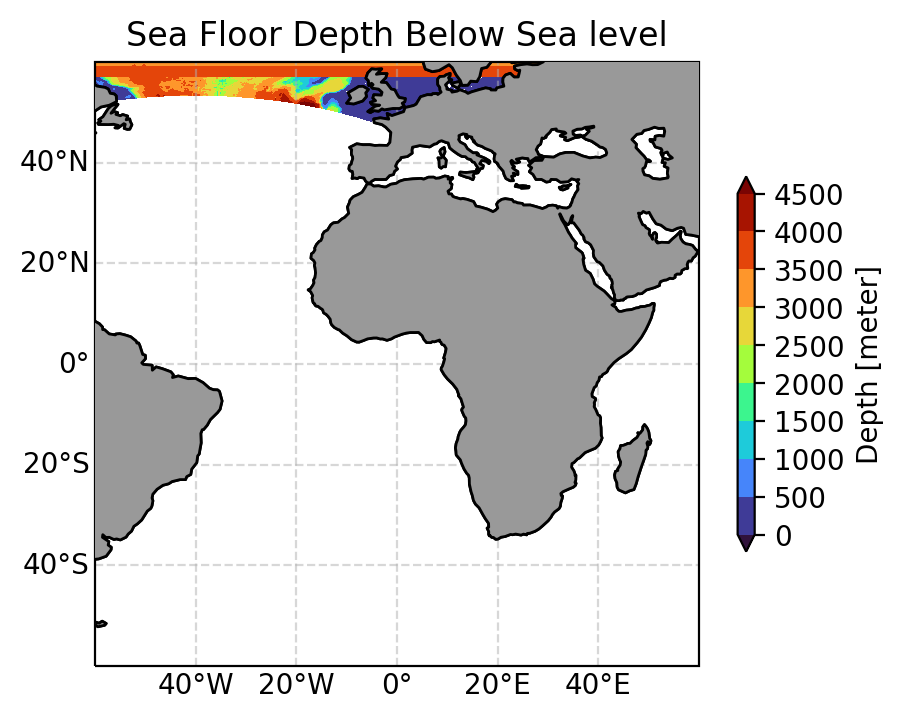

In [10]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=0))  # Orthographic

[xmin, xmax, ymin, ymax] = [-60, 60, -60, 60]
extent = [xmin, xmax, ymin, ymax]

#tind=-1
#day_str = np.datetime_as_string(ds.time[tind], unit='D')
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.set_title('Sea Floor Depth Below Sea level')

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

levels = np.arange(0,5000,500)

cs = ax.contourf(ds.longitude,ds.latitude,np.squeeze(sea_floor_depth_below_sea_level), levels, extend='both', transform=ccrs.PlateCarree())
# cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
#cb = plt.colorbar(cs,fraction = 0.022,extend='both')
rd = plt.colorbar(cs,fraction = 0.022,extend='both')
rd.set_label('Depth [meter]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')

#plot_ops_area(ax,transform=ccrs.PlateCarree(),color='w')

# Add a 10 km scale bar
#km_per_deg_lat=gsw.geostrophy.distance((125,125), (37,38))/1000
#deg_lat_equal_10km=10/km_per_deg_lat
#ax.plot(-123.75+np.asarray([0, 0]),36.75+np.asarray([0.,deg_lat_equal_10km]),transform=ccrs.PlateCarree())

if savefig:                              
    plt.savefig(__figdir__+'DP.'+Tidalfiletype,**savefig_args)